In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data_Clean_Titles.csv')

In [3]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Revenue(In Millions)
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],6.510861,23439.382474,0.600,6.510861,169
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],8.200000,808582.000000,40.965,8.200000,16
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],7.700000,107673.000000,10.010,7.700000,73
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],8.200000,534486.000000,15.461,8.200000,23
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,Unrated,150,"['war', 'action']","['GB', 'US']",7.700000,72662.000000,20.398,7.700000,300


In [4]:
df['genres'] = df['genres'].str.split(", ")
df = df.explode('genres')
df.rename(columns={'genres': 'genre'},inplace=True)
df['genre'] = df['genre'].str.replace('[', '').str.replace(']', '')
df['genre']=df['genre'].astype(str)
df.head()

,id,title,type,description,release_year,age_certification,runtime,genre,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Revenue(In Millions)
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,'documentation',['US'],6.510861,23439.382474,0.600,6.510861,169
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,'drama',['US'],8.200000,808582.000000,40.965,8.200000,16
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,'crime',['US'],8.200000,808582.000000,40.965,8.200000,16
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,'drama',['US'],7.700000,107673.000000,10.010,7.700000,73
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,'action',['US'],7.700000,107673.000000,10.010,7.700000,73


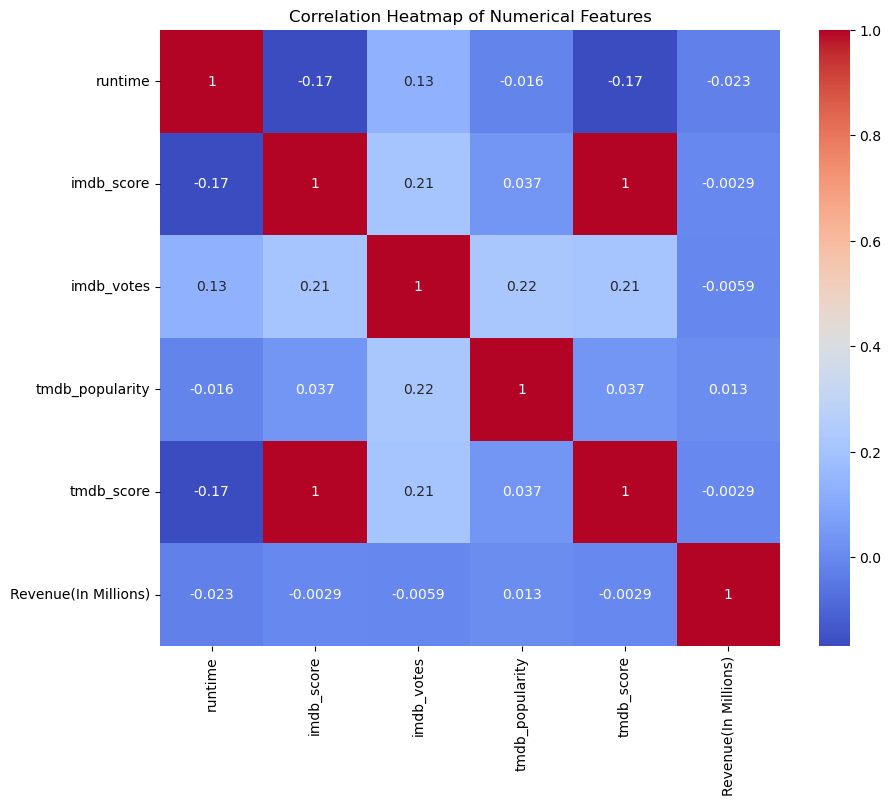

In [19]:
# Selecting only numerical columns
numerical_cols = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'Revenue(In Millions)']
corr = df[numerical_cols].corr()

# Plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

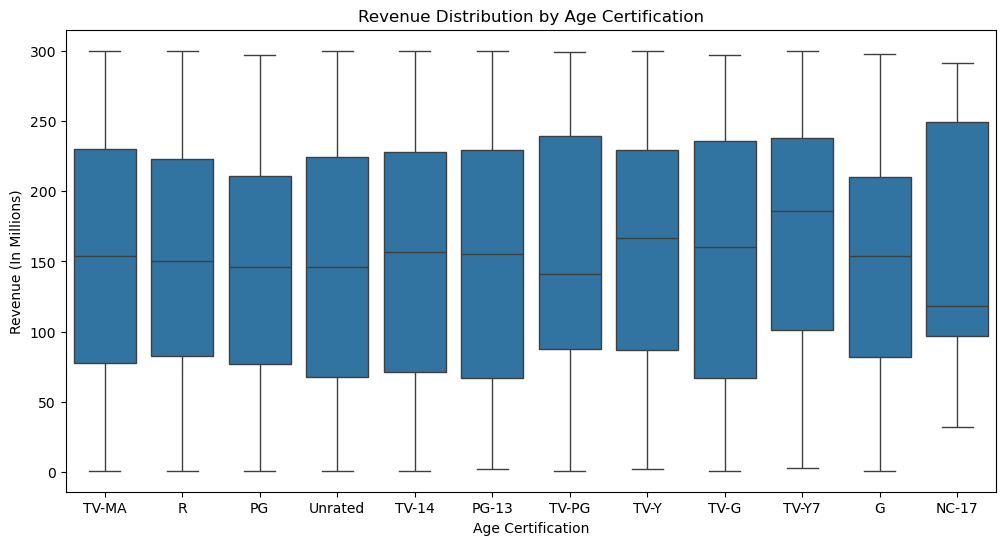

In [ ]:
#Boxplot: Revenue by Age Certification
plt.figure(figsize=(12,6))
sns.boxplot(x='age_certification', y='Revenue(In Millions)', data=df)
plt.title('Revenue Distribution by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Revenue (In Millions)')
plt.show()

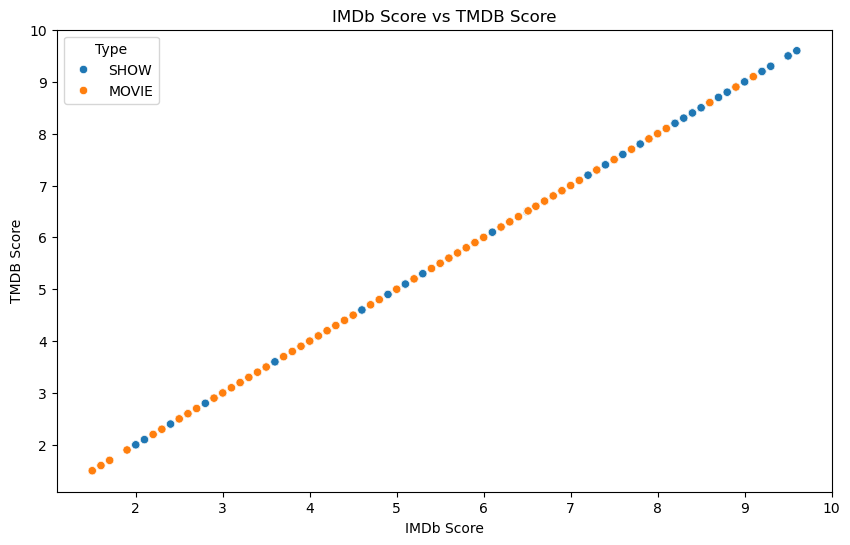

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='imdb_score', y='tmdb_score', data=df, hue='type')
plt.title('IMDb Score vs TMDB Score')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.legend(title='Type')
plt.show()

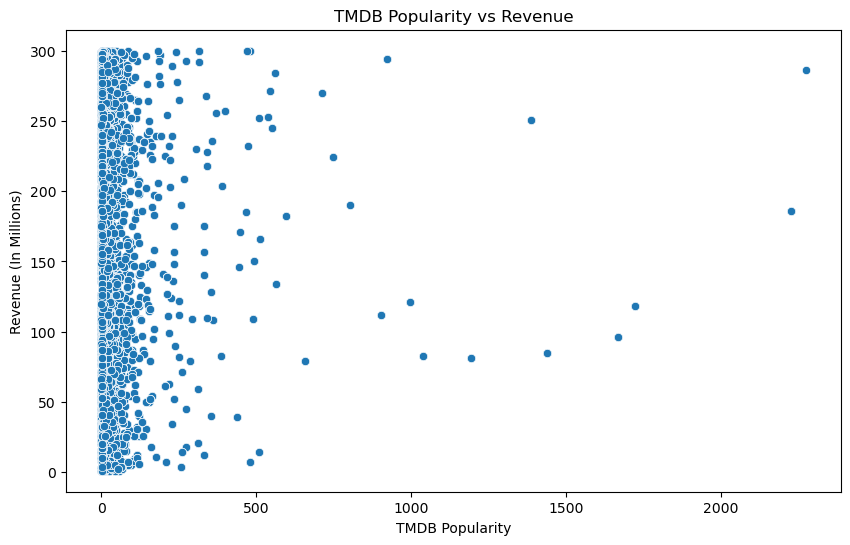

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='tmdb_popularity', y='Revenue(In Millions)', data=df)
plt.title('TMDB Popularity vs Revenue')
plt.xlabel('TMDB Popularity')
plt.ylabel('Revenue (In Millions)')
plt.show()
